# Pymaceuticals Inc.
---

### Analysis

Based on my analysis it is determined that:

* There appears to be a direct correlation between weight and the size of the tumor. Mice who weighted lower had a lower  tumor volume than those of height weights
* The more the mouse weights, the least effective any drug regiment will be
* Capomulin appears to be an effective drug. The tumor size in mouse l509 decreased overall in 45 days. It had two slight increases but overall the total volume decreased significantly.

Outliers could be the differences in age and weight in the mice taking all the different drug reigements as the standa deviation was well abouve 3 on all drugs. 

Limitations could be that although studies can be done on mice and have a high rate of being compared to a human, we do not yet have any data of how the drug regiments would work on human with squamous cell carcinoma (SCC)
 
 We could use this data to determine what would be best for individuals, depending on weight and male or female, but Overall Capomulin appears to be an effective drug regiment.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Pymamceuticals_Data = pd.merge (mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
Pymamceuticals_Data.head()[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [22]:
# Checking the number of mice.
print(f"Number of Unique Mice: {Pymamceuticals_Data ["Mouse ID"].nunique()}")

Number of Unique Mice: 249


In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates= Pymamceuticals_Data[Pymamceuticals_Data.duplicated(subset= ["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
dup_mice = Pymamceuticals_Data.loc[Pymamceuticals_Data["Mouse ID"] == "g989", :]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Optional: Get all the data for the duplicate mouse ID.


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = Pymamceuticals_Data.loc[(Pymamceuticals_Data['Mouse ID'] != 'g989')] 
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of Unique Mice: {clean_study_df ["Mouse ID"].nunique()}")

Number of Unique Mice: 248


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_tumor = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": stdev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})


summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df2 = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean="mean",Median="median",Variance="var",Std_Dev="std",SEM="sem").reset_index()
summary_stats_df2

,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mice'>

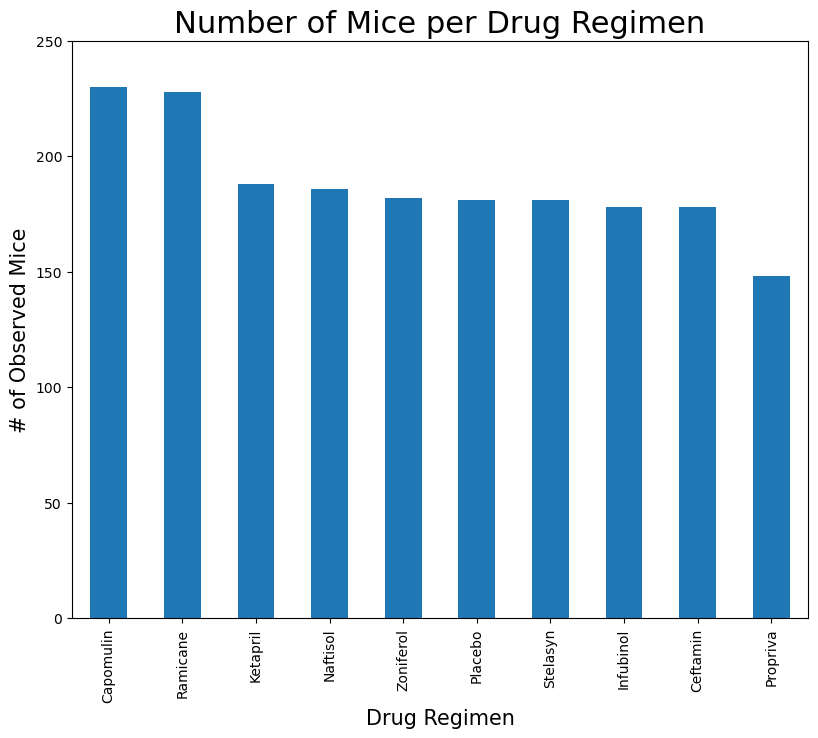

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


mice_per_drug = clean_study_df["Drug Regimen"].value_counts().plot(kind="bar", figsize = (9.5,7.5))


mice_per_drug.set_xlabel ("Drug Regimen", size = 15)
mice_per_drug.set_ylabel ("# of Observed Mice", size = 15)
plt.title("Number of Mice per Drug Regimen", size = 22)
plt.ylim(0, max(clean_study_df["Drug Regimen"].value_counts() + 20))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


mice_per_drug

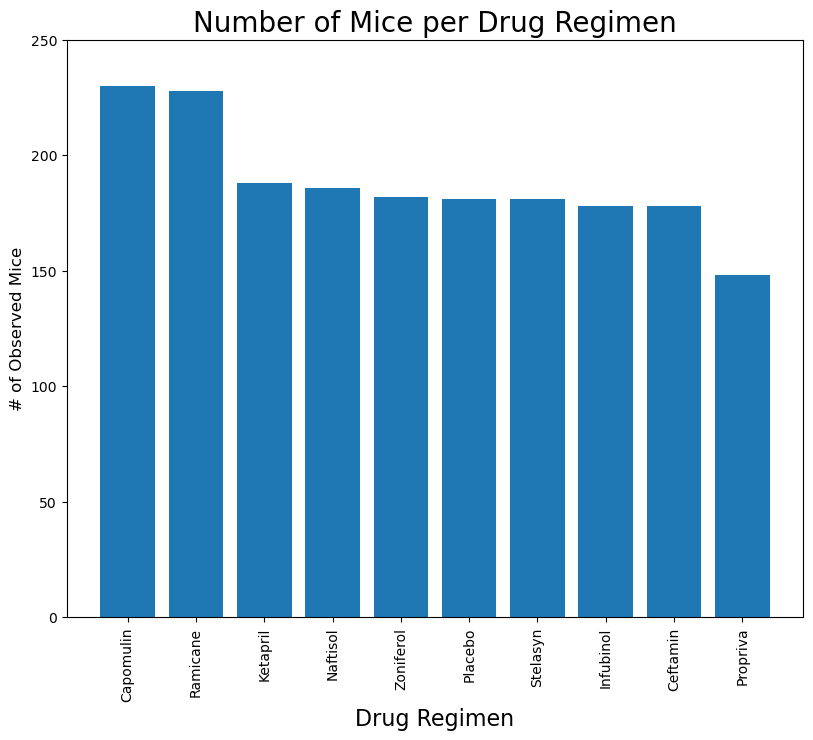

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_per_drug = clean_study_df["Drug Regimen"].value_counts()

plt.figure(figsize=(9.5,7.5))
plt.bar(mice_per_drug.index, mice_per_drug.values)
plt.title("Number of Mice per Drug Regimen", size = 20)
plt.xlabel("Drug Regimen", size =16)
plt.ylabel("# of Observed Mice", size = 12)
plt.ylim(0, max(clean_study_df["Drug Regimen"].value_counts() + 20))
plt.xticks(rotation="vertical", fontsize=10)
plt.yticks(fontsize=10)

plt.show()

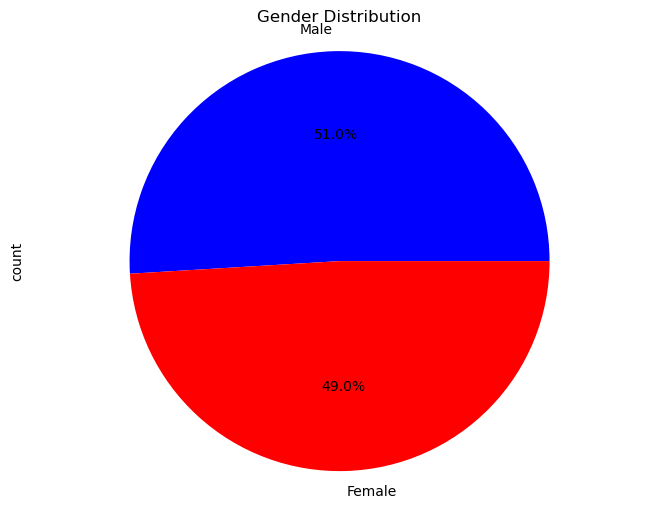

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_distribution = clean_study_df["Sex"].value_counts()

plt.figure()
figure=gender_distribution.plot(kind="pie",title="Gender Distribution", y= gender_distribution.index, autopct= "%1.1f%%", figsize=(8, 6), labels = gender_distribution.index, colors = ["blue","red"])
plt.axis('equal')

# Make the pie chart
plt.show()

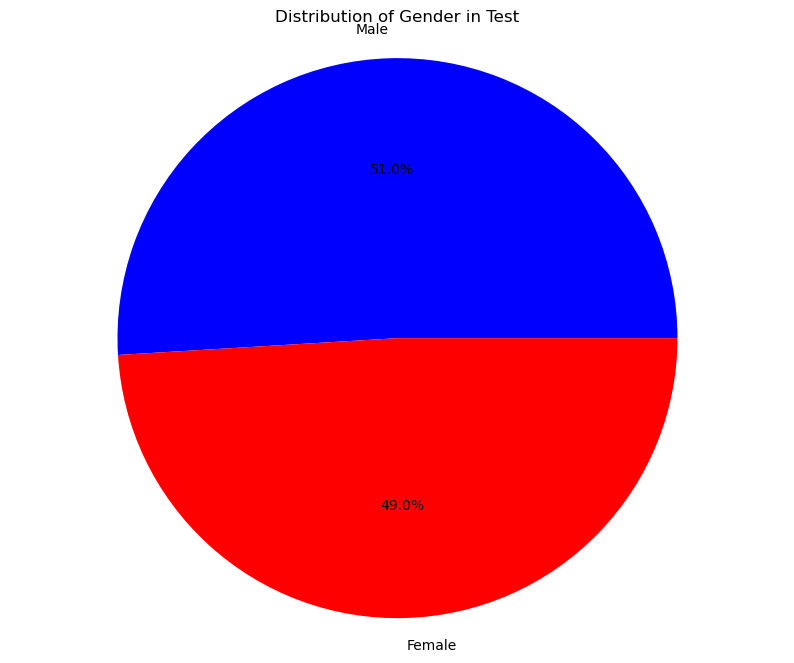

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
colors = ["blue","red"]
labels = gender_distribution.index
plt.figure(figsize=(10, 8))
plt.pie(gender_distribution, labels=labels, colors=colors,autopct="%1.1f%%")
plt.title("Distribution of Gender in Test")
plt.axis("equal") 
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_regimen = clean_study_df[clean_study_df["Drug Regimen"].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_study_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = greatest_timepoint.merge(clean_study_df,on=['Mouse ID','Timepoint'],how="left")
final_tumor_volume



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
for regimen in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']

# add subset 
    tumor_vol_data.append(regimen_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = regimen_data.quantile([0.25,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
# Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]

    print(f"{regimen}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


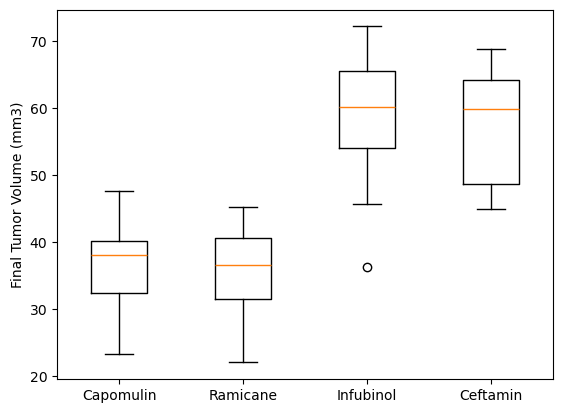

In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
red = dict(markerfacecolor="red", markersize=10)
plt.show()

## Line and Scatter Plots

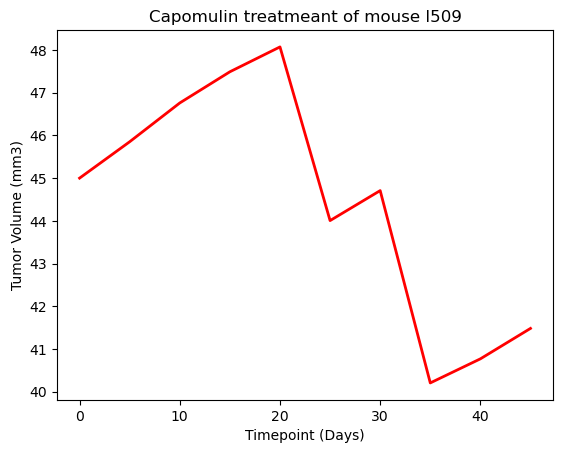

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = clean_study_df.loc[clean_study_df["Mouse ID"] == "l509",:]
capomulin_mouse
# defined the x axis list by calling the timepoints from the l509 dataframe

x_axis = capomulin_mouse["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12, color='r') 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

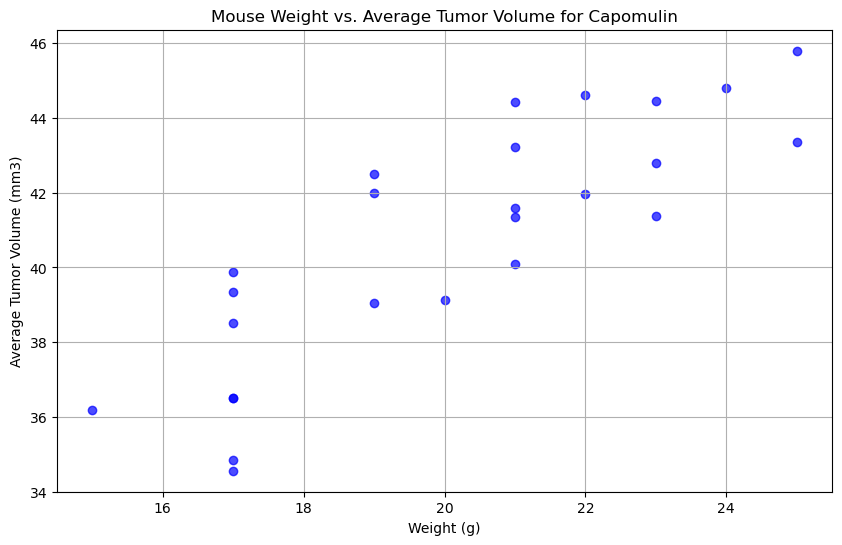

In [38]:

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_study_df.loc[clean_study_df["Drug Regimen"] == "Capomulin"]

# Convert columns to numeric to ensure proper aggregation using .loc to avoid warnings
capomulin_df.loc[:, 'Weight (g)'] = pd.to_numeric(capomulin_df['Weight (g)'], errors='coerce')
capomulin_df.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(capomulin_df['Tumor Volume (mm3)'], errors='coerce')

# Group by Mouse ID and calculate the mean for each mouse
capomulin_average = capomulin_df.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
})

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], marker='o', alpha=0.7, color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.grid(True)


plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is : 0.84
Linear regression model: y = 0.95x + 21.55


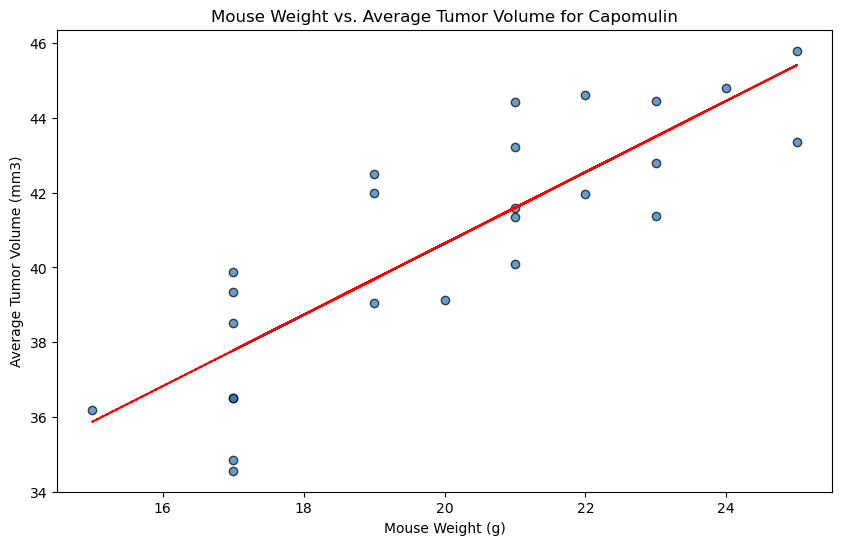

In [39]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weights = capomulin_average['Weight (g)'].values
average_tumor_volumes = capomulin_average['Tumor Volume (mm3)'].values

# Calculate the correlation coefficient
correlation, _ = pearsonr(mouse_weights, average_tumor_volumes)
print(f"The correlation between mouse weight and the average tumor volume is : {correlation:.2f}")

# Perform linear regression
model = LinearRegression()
model.fit(mouse_weights[:, np.newaxis], average_tumor_volumes)

# Get the coefficient of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear regression model: y = {slope:.2f}x + {intercept:.2f}")

# Plot the scatter plot & regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volumes, marker='o', edgecolors='black', alpha=0.7)
plt.plot(mouse_weights, model.predict(mouse_weights[:, np.newaxis]), color='red', linestyle='--')

# Set the title and labels for the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()